In [983]:
from bs4 import BeautifulSoup
from pandas import DataFrame
from time import sleep
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import datetime
import requests
import glob   
import os
import io
import re

In [1331]:

import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [984]:
make_model_keys=pd.read_html('https://www.kbb.com/car-make-model-list/new/view-all/')

In [985]:
df_make_model=pd.DataFrame(make_model_keys[0])

In [986]:
df_make_model=df_make_model[['Make','Model']]

In [987]:
df_make_model['Model']=df_make_model['Model'].apply(lambda x: x.lower())

df_make_model['Make']=df_make_model['Make'].apply(lambda x: x.lower())

In [988]:
make=result

In [989]:
len(make)

45

In [990]:
df_model=df_make_model['Model'][df_make_model['Make'].isin(make)]

In [991]:
model=df_model.tolist()

In [1000]:
collection_df = pd.DataFrame()
for f in glob.glob(r"C:\Users\Silmi\Desktop\UsedCar-PriceEstimator\data\*.csv"):
    appenddata = pd.read_csv(f)
    collection_df = collection_df.append(appenddata)

In [1002]:
collection_df.drop_duplicates(inplace=True)

collection_df.shape

(27311, 16)

In [1003]:
df_=collection_df.copy()

In [1004]:
df_.shape

(27311, 16)

In [1005]:
df_['make:'].nunique()

471

In [1006]:
df_['make:'].replace(['mazda','MAZDA'],'mazda',inplace=True)
df_['make:'].replace(['MITSUBISHI'],'mitsubishi',inplace=True)
df_['make:'].replace(['mercedes','Mercedes-benz','Mercedez','Mersedes','mbz','Mbz',
                      'mercedez','mercedes-benz','Mercedes',
                      'Benz','MERCEDES','Merceds','MERCEDES-BENZ',
                      'Mercedes-Benz','mersedes'],'mercedes-benz',inplace=True)
df_['make:'].replace([ 'Cevrolet','Chaey','Chebrolet','Chevelle','Chevorlet','Chevroler',
                      'Chevrolet','Chevrolete','Chevy.','chevrolet','Chverolet','Shevrolet',
                      'chevrolet','Chevi','CHEVY','Chevrolet',
                      'chevorlet','chevy','CHEVRLET','Cheverolet','Chevy','Chev',
                      'CHEVROLET','chev'],'chevrolet',inplace=True)
df_['make:'].replace(['volkseagen','volkswagon','volkwagen', 'Volkswagon',
                      'Volkswangen','Volkwagen','volkswagen',
                      'Vw','VW','vw','VOLKSWAGEN','V.W'],'volkswagen',inplace=True)
df_['make:'].replace(['TOYOYA','toyta','Toyot','Toyoda','TOYOTA',
                      'toyota'],'toyota',inplace=True)
df_['make:'].replace(['Mini','MINI'],'mini',inplace=True)
df_['make:'].replace(['Isuzu','Izusu','Izuzu','izuzu','isuzu'],'isuzu',inplace=True)
df_['make:'].replace(['hyndai','hynduia','Hyuandi','Hunday','hundai','hyundia',
                      'HYUNDAI'],'hyundai',inplace=True)
df_['make:'].replace(['Bmw','bimmer','Bmw'],'bmw',inplace=True)
df_['make:'].replace(['Audi','AUDI'],'audi',inplace=True)
df_['make:'].replace(['LEXUS','Lexus'],'lexus',inplace=True)
df_['make:'].replace(['KIA','Kia'],'kia',inplace=True)
df_['make:'].replace(['Ford','FORD','for'],'ford',inplace=True)
df_['make:'].replace(['HUMMER','Hummer','hummer','Gmc','GMC','Gmc'],'gmc',inplace=True)
df_['make:'].replace(['HONDA','Houda','honda'],'Honda',inplace=True)
df_['make:'].replace(['jeep','Jeeb','JEEP'],'Jeep',inplace=True)
df_['make:'].replace(['audi','AUDI'],'Audi',inplace=True)
df_['make:'].replace(['VOLVO', 'volvo'],'Volvo',inplace=True)
df_['make:'].replace(['Infinti','infinti','INFINITI','infiniti',
                      'infinity'],'Infinity',inplace=True)
df_['make:'].replace(['FIAT', 'fiat'],'Fiat',inplace=True)
df_['make:'].replace(['Nissin','NISSAN','Nissan'],'nissan',inplace=True)
df_['make:'].replace(['PORSCHE','porsche'],'Porsche',inplace=True)
df_['make:'].replace(['model','Model','TESLA','TELSA','Tesla'],'tesla',inplace=True)
df_['make:'].replace(['alfa Romeo','Alfa','alfa'],'Alfa Romeo',inplace=True)
df_['make:'].replace(['land-rover','LANDROVER','Rover','rover','land','Land rover',
                      'land rover'],'land rover',inplace=True)
df_['make:'].replace([ 'chryler','chrystler','chyrsler','chysler',
                      'chrysler','CRYSLER','Cheysler'],'chrysler',inplace=True)
df_['make:'].replace(['pontaic','pontiac'],'pontiac',inplace=True)



In [1007]:
df_['make:'].nunique()

363

In [1008]:
df_.shape

(27311, 16)

In [1009]:
df_['make:']=df_['make:'].apply(lambda x: x.lower())

In [1010]:
df_=df_[df_['make:'].isin(make)]

In [1011]:
df_.shape

(25970, 16)

In [1012]:
df_['model:']=df_['model:'].apply(lambda x: x.lower())
df_['trim:'].fillna('', inplace=True)
df_['trim:']=df_['trim:'].apply(lambda x: x.lower())

In [1013]:
# get rid of benz in model

In [1014]:
df_['model:']=df_['model:'].apply(lambda x: x.replace('-',""))
df_['model:']=df_['model:'].apply(lambda x: x.replace(',',""))
df_['model:']=df_['model:'].apply(lambda x: x.replace('.',""))

In [1015]:
#df_.groupby(by="model:",axis=0)["price:"].median()[145:175]
#df_[df_['trim:']=='c320']
#len(df_['model:'])/df_['model:'].nunique()
#df_['model:'].value_counts()[500:550]

In [1016]:

df_['Make&Model'] = df_[['make:', 'model:']].apply(lambda x: ' '.join(x), axis=1)

In [1017]:
df=df_[['year:','Make&Model','trim:','condition:','odometer:',
                          'cylinders:','color:','transmission:',
                          'type:','status:','drive:','fuel:','price:']]

In [2027]:
df['Make&Model'].value_counts().sort_values(0,ascending=False)[20:45]

mini cooper          140
ford focus           136
toyota tundra        122
gmc sierra           119
ford f350            115
ford fusion          114
ford ranger          112
ford explorer        112
nissan sentra        108
hyundai sonata       108
hyundai elantra      103
audi a4               99
nissan versa          99
bmw x5                97
toyota highlander     96
chevrolet tahoe       95
lexus es              94
ford escape           94
honda pilot           90
lexus rx              89
jeep grand            88
toyota rav4           86
chevrolet camaro      86
subaru forester       85
subaru impreza        84
Name: Make&Model, dtype: int64

In [2369]:
df_a4=df[df['Make&Model']=='toyota corolla']

In [2370]:
df_a4 = df_a4[df_a4['price:'].notna()]

In [2371]:
df_a4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 58 to 2755
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year:          315 non-null    float64
 1   Make&Model     315 non-null    object 
 2   trim:          315 non-null    object 
 3   condition:     249 non-null    object 
 4   odometer:      315 non-null    int64  
 5   cylinders:     225 non-null    object 
 6   color:         203 non-null    object 
 7   transmission:  315 non-null    object 
 8   type:          170 non-null    object 
 9   status:        315 non-null    object 
 10  drive:         168 non-null    object 
 11  fuel:          315 non-null    object 
 12  price:         315 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 34.5+ KB


In [2372]:
from scipy import stats
df_a4=df_a4[(np.abs(stats.zscore(df_a4['price:'])) < 3)]

In [2220]:
col_drop=['Make&Model','trim:','color:','type:']
df_a4['year:']=df_a4['year:'].astype(int)
df_a4['price:']=df_a4['price:'].astype(int)
df_a4.drop(columns=col_drop, inplace=True)
df_a4=df_a4.reset_index(drop=True)

In [2222]:
df_a4=df_a4[df_a4['price:']>500]

In [2225]:
df_a4=df_a4.drop_duplicates()

In [2227]:
df_a4['condition:']=df_a4['condition:'].fillna("good")
df_a4['drive:']=df_a4['drive:'].fillna("fwd")
df_a4['cylinders:']=df_a4['cylinders:'].fillna("4")
df_a4['cylinders:']=df_a4['cylinders:'].replace('other','4')
df_a4['cylinders:']=df_a4['cylinders:'].apply(lambda x: int(x))

In [2229]:
cleanup_nums = {"condition:": {"new":6,"good": 3, "excellent": 5,"like": 4,"fair": 2,"salvage": 1},
                "transmission:": {"automatic": 1, "manual": 2, "other":3 },
               "status:":{"clean": 4, "salvage": 3, "missing":2,"lien":2,"parts":1,"rebuilt":3},
               "drive:":{"4wd": 3, "rwd": 2, "fwd":1},
               "fuel:":{'electric':5,"gas": 4, "diesel": 3, "hybrid":2,"other":1}}

In [2230]:
df_a4= df_a4.replace(cleanup_nums)

In [2232]:
X=df_a4.drop(columns='price:')
y=df_a4['price:']

In [2233]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=47)

In [2234]:
X_train.shape, X_test.shape

((76, 8), (9, 8))

In [2235]:
y_train.shape, y_test.shape

((76,), (9,))

In [2236]:
def r_squared(y, ypred):
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [2237]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([7230.36827957, 7230.36827957, 7230.36827957, 7230.36827957,
       7230.36827957])

In [2241]:
#Code task 10#
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_train)

In [2242]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [2243]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [2244]:
median_r2 = r2_score(y_train, y_tr_pred)

In [2245]:
median_r2

0.5047001952519999

In [2365]:
final_links=['https://sfbay.craigslist.org/nby/cto/d/mill-valley-2002-honda-accord/7262281410.html']

In [2366]:
spec_list=[]
title_list=[]
price_list=[]

for lin in final_links:
    try:
        page = requests.get(lin)
        soup = BeautifulSoup(page.text, "html.parser")
        spec_list.append(soup.find_all("p", {"class": "attrgroup"})[1].text.strip('\n').replace("\n"," ").split(" "))
        title_list.append(soup.find_all("p", {"class": "attrgroup"})[0].text.strip('\n'))
        price_list.append(str(soup.find("span", {"class": "price"})).strip('$').replace(',',""))
    except:
        continue
df_=pd.DataFrame(columns=['year:','make:','model:','trim:','VIN:','condition:','odometer:',
                          'cylinders:','color:','transmission:',
                          'type:','status:','drive:','fuel:','price:'])
for i,title in enumerate(title_list):
    if(len(title.split())>=4 and not(title.split()[1].isnumeric())):
            df_.loc[f'{i}','year:']=title.split()[0]
            df_.loc[f'{i}','make:']=title.split()[1]
            df_.loc[f'{i}','model:']=title.split()[2]
            df_.loc[f'{i}','trim:']=title.split()[3]
    if(len(title.split())==3 and not(title.split()[1].isnumeric())):
            df_.loc[f'{i}','year:']=title.split()[0]
            df_.loc[f'{i}','make:']=title.split()[1]
            df_.loc[f'{i}','model:']=title.split()[2]
            df_.loc[f'{i}','trim:']= np.nan
    if(len(title.split())==4 and title.split()[1].isnumeric()):
            df_.loc[f'{i}','year:']=title.split()[0]
            df_.loc[f'{i}','make:']=title.split()[2]
            df_.loc[f'{i}','model:']=title.split()[3]
            df_.loc[f'{i}','trim:']= np.nan
    if(len(title.split())>=5 and title.split()[1].isnumeric()):
            df_.loc[f'{i}','year:']=title.split()[0]
            df_.loc[f'{i}','make:']=title.split()[2]
            df_.loc[f'{i}','model:']=title.split()[3]
            df_.loc[f'{i}','trim:']= title.split()[4]

for i,temp in enumerate(spec_list):
    for word in temp:
        if(word=='VIN:'):
            df_.loc[f'{i}','VIN:']=temp[temp.index(word)+1]    
        if(word=='condition:'):
             df_.loc[f'{i}','condition:']=temp[temp.index(word)+1] 
        if(word=='odometer:'):
            df_.loc[f'{i}','odometer:']=temp[temp.index(word)+1]
        if(word=='cylinders:'):
             df_.loc[f'{i}','cylinders:']=temp[temp.index(word)+1]
        if(word=='color:'):
             df_.loc[f'{i}','color:']=temp[temp.index(word)+1]
        if(word=='transmission:'):
             df_.loc[f'{i}','transmission:']=temp[temp.index(word)+1]
        if(word=='type:'):
             df_.loc[f'{i}','type:']=temp[temp.index(word)+1]
        if(word=='status:'):
             df_.loc[f'{i}','status:']=temp[temp.index(word)+1]
        if(word=='drive:'):
             df_.loc[f'{i}','drive:']=temp[temp.index(word)+1] 
        if(word=='fuel:'):
             df_.loc[f'{i}','fuel:']=temp[temp.index(word)+1]
for i,p in enumerate(price_list):
    df_.loc[f'{i}','price:']=p
df_['price:']=df_['price:'].apply(lambda x: x[21:-7])
df_['price:'] = pd.to_numeric(df_['price:'])
df_['year:'] = pd.to_numeric(df_['year:'])
df_['odometer:'] = pd.to_numeric(df_['odometer:'])

In [2367]:
df_.head()

,year:,make:,model:,trim:,VIN:,condition:,odometer:,cylinders:,color:,transmission:,type:,status:,drive:,fuel:,price:
0,2002,honda,accord,NaN,NaN,good,110000,6,white,automatic,coupe,clean,NaN,gas,1200


In [2260]:
test = scaler.transform(feed)

In [2261]:
test1 = lm.predict(test)

In [2262]:
test1

array([14645.25548333])

In [1194]:
df=df.drop_duplicates()

In [2344]:
df.shape

(16740, 13)

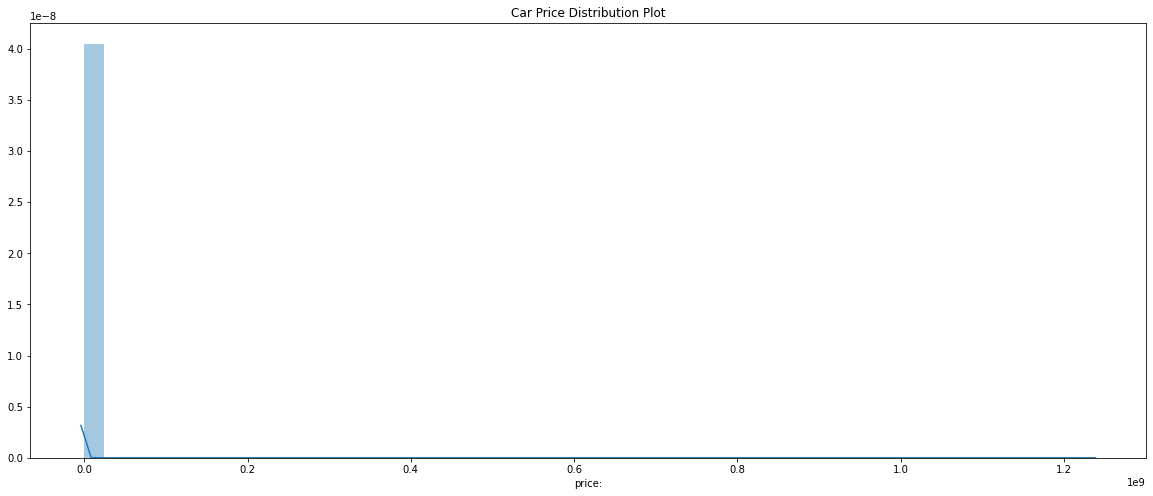

In [928]:
plt.figure(figsize=(20,8))

plt.subplot()
plt.title('Car Price Distribution Plot')
sns.distplot(df['price:'])


plt.show()

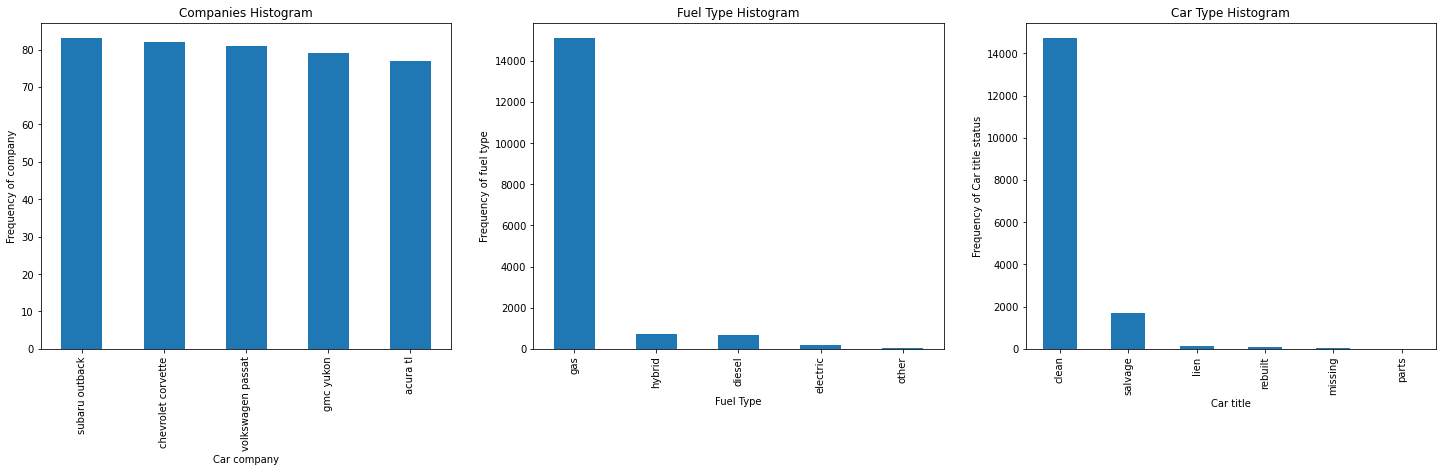

In [934]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['Make&Model'].value_counts()[45:50].plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df['fuel:'].value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df['status:'].value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car title', ylabel='Frequency of Car title status')

plt.show()

In [931]:
df.columns

Index(['year:', 'Make&Model', 'trim:', 'condition:', 'odometer:', 'cylinders:',
       'color:', 'transmission:', 'type:', 'status:', 'drive:', 'fuel:',
       'price:'],
      dtype='object')

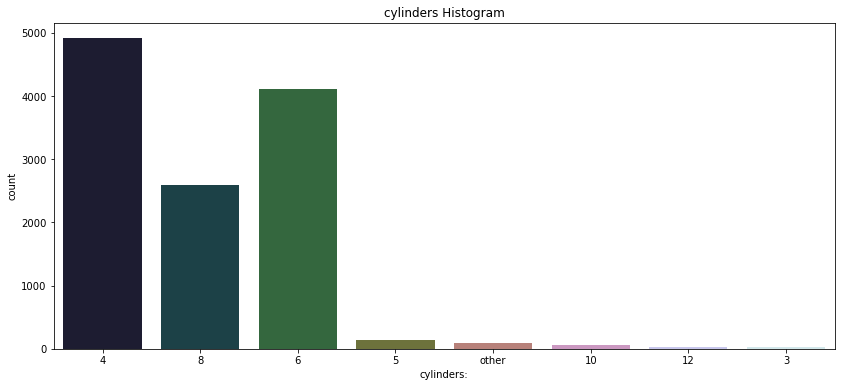

In [694]:
plt.figure(figsize=(14,6))

plt.subplot()
plt.title('cylinders Histogram')
sns.countplot(df['cylinders:'], palette=("cubehelix"))

plt.show()

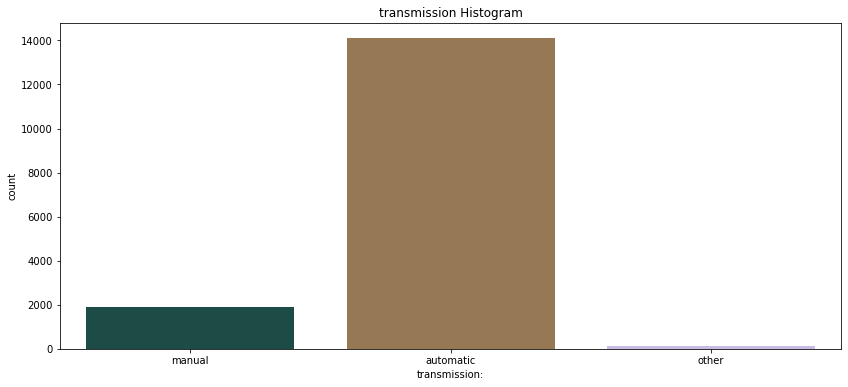

In [695]:
plt.figure(figsize=(14,6))

plt.subplot()
plt.title('transmission Histogram')
sns.countplot(df['transmission:'], palette=("cubehelix"))


plt.show()